# Import Necessary Package

In [ ]:
!pip install Sastrawi
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.2 MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.5-py3-none-any.whl size=24484 sha256=4f4fd6fb337a5cb732cf05e1230c26184bfaeaf7f9acb827ce95abf8e2af6bde
  Stored in directory: /root/.cache/pip/wheels/4a/26/18/48fda51f20c9e550c735fa6f3a6887dc8836f8d709a3cf8a9c
Successfully built google-play-scraper


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

nltk.download('stopwords')

from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from google_play_scraper import app

from wordcloud import WordCloud
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Web Scraping

In [ ]:
#reference : https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/# Scrape All available reviews 
#(DONT RUN THIS CELL!!! IF YOU DONT WANT TO SCRAPE ALL REVIEWS)

from google_play_scraper import Sort, reviews_all

result = reviews_all(
    'com.telkom.tracencare',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT , you can use Sort.NEWEST to get newst reviews
)

In [ ]:
#Scrape desired number of reviews

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.telkom.tracencare',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=100, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [ ]:
df_temp = pd.DataFrame(np.array(result),columns=['review'])
df_temp = df_temp.join(pd.DataFrame(df_temp.pop('review').tolist()))
df_temp.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOH0cGnQGC3IZAvYIMNWc8qkGJ447WluiGWKP36...,Shiva Pauzia Anjani,https://play-lh.googleusercontent.com/a-/AOh14...,Bagus sekali aku senang...tapi boong yahahahha...,5,0,3.4.6,2022-05-25 01:43:18,None,NaT
1,gp:AOqpTOEBxRxuOS5TngvyuLEt0a2OBPMcjLMEAuP5Ean...,Egi Ardiansyah,https://play-lh.googleusercontent.com/a/AATXAJ...,"Awalnya saya kira ini bug, ketika saya ingin m...",4,0,4.4.3.2,2022-05-25 01:25:20,"Halo,\n\nMohon maaf atas ketidaknyamanannya.\n...",2022-05-23 12:15:01
2,gp:AOqpTOFN19GH4oNolRI6KduQ-UEwHiiRw3hLnHwpHK7...,Imronis Perjelata,https://play-lh.googleusercontent.com/a/AATXAJ...,Ini aplikasinya rusak,1,0,4.4.3.2,2022-05-25 01:18:38,None,NaT


In [ ]:
#Run This Code to Sort the Data By Date 

df_temp = df_temp[['userName', 'score','at', 'content']]
df = df_temp.sort_values(by='at', ascending=True) #Sort by Newst, change to True if you want to sort by Oldest.
df.head()

,userName,score,at,content
99,Rosdiana Fattah,4,2022-05-24 08:04:43,Ol
98,Euis Kartika,5,2022-05-24 08:23:16,Ok
97,AOCD Advanture,5,2022-05-24 08:41:19,Mantul
96,Maryati ade,1,2022-05-24 08:44:09,Gajelas Masa pas mau cek ulang jenis vaksin ti...
95,Warung Kopi,5,2022-05-24 08:54:38,Tolong swrtifikatku vaksin ke 3 keluarkan akan...


In [ ]:
# Menyingkat nama pemberi ulasan menjadi inisial
for i in range(0,len(df)):
    text = df['userName'][i].upper()
    df.loc[i,'userName'] = text

for i in range(0,len(df)):
    text = re.sub('[^a-zA-Z]', ' ', df['userName'][i])
    df.loc[i,'userName'] = text
    
user = []
for i in range(0, len(df)):
    initial = [s[0] for s in df['userName'][i].split()]
    user.append(initial)
    
uname = []
for i in range(0, len(user)):
    word1 = user[i]
    word2 = ''.join(word1)
    uname.append(word2)

df_user = pd.DataFrame(uname, columns = ['Pengguna'])
df = pd.concat([df_user, df], axis=1)
df.drop(columns=['userName', 'score'], inplace=True)
df.columns = ['pengguna', 'at', 'review']

In [ ]:
df.to_csv("scrapped_data_full.csv", index = False)  #Save the file as CSV , to download: click the folder icon on the left. the csv file should be there.

# Creating word cloud from the collected data

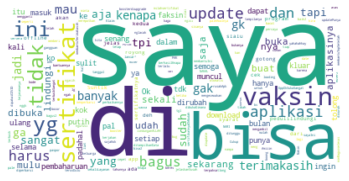

In [ ]:
corpus = []
for i in range(0, len(df)):
    corpus.append(df.loc[i, 'review'])

text = ''.join(map(str, corpus))
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('wordcloud.png')
plt.show()

# Text Preprocessing

In [ ]:
df = pd.read_csv('/content/data.csv')
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df.columns = ['No', 'Pengguna', 'waktu', 'review', 'label']
df

,No,Pengguna,waktu,review,label
0,0,DAS,2021-12-03 0:04:06,Manajih kaga ke download dongload loading terus,Negatif
1,1,SJ,2021-12-03 0:05:40,Sertifikat vaksin tidak muncul.. sama tolong b...,Negatif
2,2,UN,2021-12-03 0:06:15,sertifikat vaksin keluar tp status masih merah...,Negatif
3,3,LH,2021-12-03 0:16:00,Kenapa kok nggak bisa di buka,Negatif
4,4,US,2021-12-03 0:17:38,untuk download sertifikat selalu ada kendala.,Negatif
...,...,...,...,...,...
4730,4730,SG,2021-12-14 12:40:17,Aku blm bisa bka tapi aku ksh aja bintang ya,Negatif
4731,4731,MMM,2021-12-14 12:40:58,Kurng bagus aplikasi.,Negatif
4732,4732,HG,2021-12-14 12:41:22,"Heran masih banyak yang kasih rate rendah, pad...",Positif
4733,4733,W,2021-12-14 12:44:05,Ini gk bsa ngasih minus bintang kah? Aplikasin...,Negatif


In [ ]:
# Initialization
data = {'token':['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'],
       'shift':['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'],
       'count':[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]}
 
# Create DataFrame
df3 = pd.DataFrame(data)

In [ ]:
stwo = set(stopwords.words('indonesian'))

exclude_words = set(('baik', 'order', 'tidak', 'lima', 'belum', 'bisa', 'kenapa', 'guna', 'sudah', 'namun', 'jauh', 'percuma', 'cara', 'kurang', 'harus', 'beri', 'agar', 'padahal', 'benar', 'apa', 'kurang', 'tanya', 'apakah', 'keluar', 'tapi', 'biasa', 'bukan', 'lama', 'sedangkan', 'tak', 'satu', 'dua', 'tiga', 'empat', 'jelas'))
include_words = set(('aplikasi', 'apk', 'aja', 'yg', 'ya', 'app', 'banget', 'nya', 'bintang', 'sertifikat', 'vaksin', 'yang', 'apl'))

sw = stwo.difference(exclude_words)
sw = sw.union(include_words)

In [ ]:
def split(word):
    return list(word)

In [ ]:
# 1. case folding

for i in range(0,len(df)):
    review_1 = df['review'][i].lower() #lower case all text
    
    df.loc[i,'case folding'] = review_1

In [ ]:
# 2. cleaning

for i in range(0,len(df)):
    review_1 = re.sub('[^a-zA-Z]', ' ', df['case folding'][i]) 
    df.loc[i,'cleaning'] = review_1 

In [ ]:
# 3. stemming 

for i in range(0,len(df)):
    review = df['cleaning'][i].split() 

    psi = StemmerFactory()
    stemmer = psi.create_stemmer()
    review = [stemmer.stem(word) for word in review] 
    review_1 = ' '.join(review) 

    df.loc[i,'stemming'] = review_1 

In [ ]:
# 4. stopword removal

for i in range(0,len(df)):
    review = df['stemming'][i].split() 

    review = [word for word in review if not word in sw] 
    review_1 = ' '.join(review) 
    review_2 = ''.join(review)

    df.loc[i,'sw removal'] = review_1 
    df.loc[i,'pretoken'] = review_2

In [ ]:
# tokenization

for i in range(0, len(df)):
  review = split(df['pretoken'][i])
  df.loc[:, 'pretoken'].loc[i] = review

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df

,No,Pengguna,waktu,review,label,case folding,cleaning,norm,stemming,sw removal,pretoken
0,0,DAS,2021-12-03 0:04:06,Manajih kaga ke download dongload loading terus,Negatif,manajih kaga ke download dongload loading terus,manajih kaga ke download dongload loading terus,manajih tidak ke download download loading terus,manajih tidak ke download download loading terus,manajih tidak download download loading,"[m, a, n, a, j, i, h, t, i, d, a, k, d, o, w, ..."
1,1,SJ,2021-12-03 0:05:40,Sertifikat vaksin tidak muncul.. sama tolong b...,Negatif,sertifikat vaksin tidak muncul.. sama tolong b...,sertifikat vaksin tidak muncul sama tolong b...,sertifikat vaksin tidak muncul sama tolong bua...,sertifikat vaksin tidak muncul sama tolong bua...,tidak muncul tolong buatin edit tanggal lahir ...,"[t, i, d, a, k, m, u, n, c, u, l, t, o, l, o, ..."
2,2,UN,2021-12-03 0:06:15,sertifikat vaksin keluar tp status masih merah...,Negatif,sertifikat vaksin keluar tp status masih merah...,sertifikat vaksin keluar tp status masih merah...,sertifikat vaksin keluar tapi status masih mer...,sertifikat vaksin keluar tapi status masih mer...,keluar tapi status merah bikin anak magang kek,"[k, e, l, u, a, r, t, a, p, i, s, t, a, t, u, ..."
3,3,LH,2021-12-03 0:16:00,Kenapa kok nggak bisa di buka,Negatif,kenapa kok nggak bisa di buka,kenapa kok nggak bisa di buka,kenapa kok tidak bisa di buka,kenapa kok tidak bisa di buka,kenapa tidak bisa buka,"[k, e, n, a, p, a, t, i, d, a, k, b, i, s, a, ..."
4,4,US,2021-12-03 0:17:38,untuk download sertifikat selalu ada kendala.,Negatif,untuk download sertifikat selalu ada kendala.,untuk download sertifikat selalu ada kendala,untuk download sertifikat selalu ada kendala,untuk download sertifikat selalu ada kendala,download kendala,"[d, o, w, n, l, o, a, d, k, e, n, d, a, l, a]"
...,...,...,...,...,...,...,...,...,...,...,...
4730,4730,SG,2021-12-14 12:40:17,Aku blm bisa bka tapi aku ksh aja bintang ya,Negatif,aku blm bisa bka tapi aku ksh aja bintang ya,aku blm bisa bka tapi aku ksh aja bintang ya,aku belum bisa buka tapi aku ksh saja bintang ya,aku belum bisa buka tapi aku ksh saja bintang ya,belum bisa buka tapi ksh,"[b, e, l, u, m, b, i, s, a, b, u, k, a, t, a, ..."
4731,4731,MMM,2021-12-14 12:40:58,Kurng bagus aplikasi.,Negatif,kurng bagus aplikasi.,kurng bagus aplikasi,kurang bagus aplikasi,kurang bagus aplikasi,kurang bagus,"[k, u, r, a, n, g, b, a, g, u, s]"
4732,4732,HG,2021-12-14 12:41:22,"Heran masih banyak yang kasih rate rendah, pad...",Positif,"heran masih banyak yang kasih rate rendah, pad...",heran masih banyak yang kasih rate rendah pad...,heran masih banyak yang kasih rate rendah pada...,heran masih banyak yang kasih rate rendah pada...,heran kasih rate rendah padahal mudah develope...,"[h, e, r, a, n, k, a, s, i, h, r, a, t, e, r, ..."
4733,4733,W,2021-12-14 12:44:05,Ini gk bsa ngasih minus bintang kah? Aplikasin...,Negatif,ini gk bsa ngasih minus bintang kah? aplikasin...,ini gk bsa ngasih minus bintang kah aplikasin...,ini tidak bisa ngasih minus bintang kah aplika...,ini tidak bisa ngasih minus bintang kah aplika...,tidak bisa ngasih minus kah kayak anjing sudah...,"[t, i, d, a, k, b, i, s, a, n, g, a, s, i, h, ..."


In [ ]:
# Pembagian data

X = df
y = df.label.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

In [ ]:
df.to_csv('preprocessing.csv')
X_train.to_csv('xtrain.csv')
X_test.to_csv('xtest.csv')

# Processing

In [ ]:
X_train_pos = X_train[X_train['label'] == 'Positif']
X_train_pos = X_train_pos.reset_index(drop=True)
corpus_pos = []

X_train_neg = X_train[X_train['label'] == 'Negatif']
X_train_neg = X_train_neg.reset_index(drop=True)
corpus_neg = []

In [ ]:
# Counting the number of letter transitions in each sentence
for i in range(0, len(X_train_pos)):
    teks_pos = X_train_pos['pretoken'][i]
    teks_pos = split(teks_pos)

    trans_pos = pd.DataFrame(teks_pos, columns=['token'])
    trans_pos['shift'] = trans_pos['token'].shift(-1)
    trans_pos['count'] = 1
    trans_pos = trans_pos.append(df3, ignore_index = True)

    trans_mat_pos = trans_pos.groupby(['token', 'shift']).count().unstack().fillna(0)
    corpus_pos.append(trans_mat_pos)
    
for i in range(0, len(X_train_neg)):
    teks_neg = X_train_neg['pretoken'][i]
    teks_neg = split(teks_neg)

    trans_neg = pd.DataFrame(teks_neg, columns=['token'])
    trans_neg['shift'] = trans_neg['token'].shift(-1)
    trans_neg['count'] = 1
    trans_neg = trans_neg.append(df3, ignore_index = True)

    trans_mat_neg = trans_neg.groupby(['token', 'shift']).count().unstack().fillna(0)
    corpus_neg.append(trans_mat_neg)

In [ ]:
# Calculating words transition matrix 
total_tm_pos = 0
for x in range(0, len(corpus_pos)):
    total_tm_pos = total_tm_pos + corpus_pos[x]
    total_tm_pos = total_tm_pos.fillna(0)
    
total_tm_neg = 0
for x in range(0, len(corpus_neg)):
    total_tm_neg = total_tm_neg + corpus_neg[x]
    total_tm_neg = total_tm_neg.fillna(0)

In [ ]:
# Calculating words transition probability matrix 
mpt_pos = total_tm_pos.div(total_tm_pos.sum(axis=1), axis=0)
mpt_pos = mpt_pos.fillna(0)
mpt_neg = total_tm_neg.div(total_tm_neg.sum(axis=1), axis=0)
mpt_neg = mpt_neg.fillna(0)

In [ ]:
total_tm_pos.to_csv('mt_pos.csv')
total_tm_neg.to_csv('mt_neg.csv')
mpt_pos.to_csv('mpt pos.csv')
mpt_neg.to_csv('mpt neg.csv')

# Classification

In [ ]:
X_test = X_test.reset_index(drop=True)

In [ ]:
corpus_tp = []

for i in range(0, len(X_test)):
    teks_tp = X_test['pretoken'][i]
    teks_tp = split(teks_tp)

    trans_tp = pd.DataFrame(teks_tp, columns=['token'])

    # create a new column with data shifted one space
    trans_tp['shift'] = trans_tp['token'].shift(-1)

    # add a count column (for group by function)
    trans_tp['count'] = 1

    trans_tp = trans_tp.append(df3, ignore_index = True)

    # groupby and then unstack, fill the zeros
    trans_mat_tp = trans_tp.groupby(['token', 'shift']).count().unstack().fillna(0)
    trans_mat_tp

    corpus_tp.append(trans_mat_tp)

#print(corpus_tp)
#print(len(corpus_tp))

In [ ]:
def SumProduct(df, df2):
    names1 = df.columns
    names2 = df2.columns

    totalSum = 0

    for i in range(df.shape[1]):
            for j in range (df.shape[0]):
                totalSum = totalSum + (df[names1[i]][j] * df2[names2[i]][j])
                
    return totalSum

In [ ]:
pos_val = 0
neg_val = 0

y_pred = []

poss = []
negg = []

for i in range(0, len(corpus_tp)):
    pos_val = SumProduct(corpus_tp[i], mpt_pos) 
    neg_val = SumProduct(corpus_tp[i], mpt_neg)
    
    poss.append(pos_val)
    negg.append(neg_val)
    
    
    if max(pos_val, neg_val) == pos_val:
        #print('pos')
        label_pred = 'Positif'
    else:
        #print('neg')
        label_pred = 'Negatif'
    
    y_pred.append(label_pred)
    
    dictt = {
    'xpos' : poss,
    'xneg' : negg,
    }

# creating a Dataframe object 
xdf = pd.DataFrame(dictt)
xdf

,xpos,xneg
0,5.065296,7.438637
1,1.200958,1.233930
2,1.836330,0.908005
3,0.275250,0.032087
4,9.305910,11.852170
...,...,...
942,4.727624,5.097923
943,2.436173,2.266652
944,2.434083,1.482202
945,1.714380,0.862479


In [ ]:
df_ypred = pd.DataFrame(y_pred, columns = ['Klasifikasi'])
df_cek = pd.concat([X_test, df_ypred], axis=1)
df_result = pd.concat([df_cek, xdf], axis=1)
#df_result.to_csv('hasil.csv')

In [ ]:
df_result

,No,Pengguna,waktu,review,label,case folding,cleaning,norm,stemming,sw removal,pretoken,Klasifikasi,xpos,xneg
0,469,DK,2021-12-04 4:20:47,"Aplikasi jelek, saya sudah vaksin kedua tapi s...",Negatif,"aplikasi jelek, saya sudah vaksin kedua tapi s...",aplikasi jelek saya sudah vaksin kedua tapi s...,aplikasi jelek saya sudah vaksin kedua tapi se...,aplikasi jelek saya sudah vaksin dua tapi sert...,jelek sudah dua tapi tidak muncul satu tidak t...,"[j, e, l, e, k, s, u, d, a, h, d, u, a, t, a, ...",Negatif,5.065296,7.438637
1,3515,TS,2021-12-11 6:34:34,Masih susah klo mau scan,Negatif,masih susah klo mau scan,masih susah klo mau scan,masih susah kalau mau scan,masih susah kalau mau scan,susah scan,"[s, u, s, a, h, s, c, a, n]",Negatif,1.200958,1.233930
2,4443,EA,2021-12-13 20:20:41,Ok mantap,Positif,ok mantap,ok mantap,ok mantap,ok mantap,ok mantap,"[o, k, m, a, n, t, a, p]",Positif,1.836330,0.908005
3,646,WS,2021-12-04 13:08:21,Ok,Positif,ok,ok,ok,ok,ok,"[o, k]",Positif,0.275250,0.032087
4,2105,AG,2021-12-07 23:33:13,Aplikasi buruk. Sampah! Tidak bisa log in. Ver...,Negatif,aplikasi buruk. sampah! tidak bisa log in. ver...,aplikasi buruk sampah tidak bisa log in ver...,aplikasi buruk sampah tidak bisa log in verifi...,aplikasi buruk sampah tidak bisa log in verifi...,buruk sampah tidak bisa log in verifikasi emai...,"[b, u, r, u, k, s, a, m, p, a, h, t, i, d, a, ...",Negatif,9.305910,11.852170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,4640,AW,2021-12-14 7:53:07,"Masalah captcha gagal teruss,sama isi tgl lahi...",Negatif,"masalah captcha gagal teruss,sama isi tgl lahi...",masalah captcha gagal teruss sama isi tgl lahi...,masalah captcha gagal teruss sama isi tanggal ...,masalah captcha gagal teruss sama isi tanggal ...,captcha gagal teruss isi tanggal lahir ribet ggal,"[c, a, p, t, c, h, a, g, a, g, a, l, t, e, r, ...",Negatif,4.727624,5.097923
943,255,SKW,2021-12-03 12:46:49,Cacat kameranyaa,Negatif,cacat kameranyaa,cacat kameranyaa,cacat kameranyaa,cacat kameranyaa,cacat kameranyaa,"[c, a, c, a, t, k, a, m, e, r, a, n, y, a, a]",Positif,2.436173,2.266652
944,3960,DD,2021-12-12 12:06:02,"Sangat membantu, very good",Positif,"sangat membantu, very good",sangat membantu very good,sangat membantu very good,sangat bantu very good,bantu very good,"[b, a, n, t, u, v, e, r, y, g, o, o, d]",Positif,2.434083,1.482202
945,3780,MS,2021-12-12 1:01:03,Mantappp..,Positif,mantappp..,mantappp,mantappp,mantappp,mantappp,"[m, a, n, t, a, p, p, p]",Positif,1.714380,0.862479


# Model Performance Analysis

In [ ]:
# Confusion matrix

from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[435,  83],
       [ 43, 386]])

In [ ]:
#classification report
report = classification_report(y_test, y_pred, target_names = ['Positif', 'Negatif'])
    
print(report)

              precision    recall  f1-score   support

     Positif       0.91      0.84      0.87       518
     Negatif       0.82      0.90      0.86       429

    accuracy                           0.87       947
   macro avg       0.87      0.87      0.87       947
weighted avg       0.87      0.87      0.87       947

